In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline

import matplotlib.pyplot as plt

import time
import functions
import datetime

In [114]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv',usecols=)

borough_lst = list(np.unique(taxi_zone_lookup.Borough))

In [ ]:
# 6 - 11
# 11 - 14
# 14 - 17
# 17 - 21
# 21 - 6

# every 6 hours

In [210]:
df = pd.read_csv(df_names[0], usecols= ['tpep_pickup_datetime', 'passenger_count'],
                 parse_dates= ["tpep_pickup_datetime"])

In [211]:
df.head()

,tpep_pickup_datetime,passenger_count
0,2018-01-01 00:21:05,1
1,2018-01-01 00:44:55,1
2,2018-01-01 00:08:26,2
3,2018-01-01 00:20:22,1
4,2018-01-01 00:09:18,2


In [212]:
df.set_index("tpep_pickup_datetime",inplace=True)

In [213]:
df.head()

,passenger_count
tpep_pickup_datetime,
2018-01-01 00:21:05,1
2018-01-01 00:44:55,1
2018-01-01 00:08:26,2
2018-01-01 00:20:22,1
2018-01-01 00:09:18,2


In [ ]:
#df.drop('trips_cnt',axis = 1)

In [49]:
df = pd.DataFrame()

tot = 0
for i in range (len(df_names)):
    temp = pd.read_csv(df_names[i], usecols= ['tpep_pickup_datetime', 'passenger_count'],
                 parse_dates= ["tpep_pickup_datetime"])
    
    tot += temp.shape[0]
    print("temp = %d" %temp.shape[0], "tot+= %d" %tot )
    df = df.append(temp)
    

temp = 8754206 tot+= 8754206
temp = 8485825 tot+= 17240031
temp = 9422476 tot+= 26662507
temp = 9298918 tot+= 35961425
temp = 9217256 tot+= 45178681
temp = 8706381 tot+= 53885062


In [50]:
df.shape[0]

53885062

In [214]:
#df.set_index("tpep_pickup_datetime",inplace=True)

In [200]:
df.head()

,passenger_count
tpep_pickup_datetime,
2018-01-01 00:21:05,1
2018-01-01 00:44:55,1
2018-01-01 00:08:26,2
2018-01-01 00:20:22,1
2018-01-01 00:09:18,2


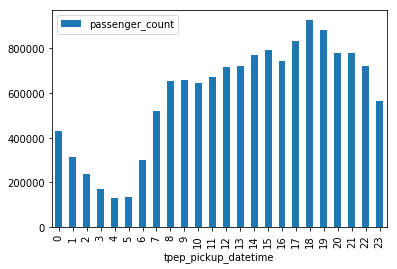

In [201]:
(df.groupby(df.index.hour).sum()).plot(kind = 'bar')

In [204]:
df.head()

,passenger_count
tpep_pickup_datetime,
0,428670
1,312387
2,235372
3,170136
4,130322


In [215]:
df = df.groupby(df.index.hour).sum()

In [216]:
df.shape

(24, 1)

In [217]:
df

,passenger_count
tpep_pickup_datetime,
0,428670
1,312387
2,235372
3,170136
4,130322
5,133500
6,298229
7,519613
8,653148


In [206]:
df.reset_index(inplace=True)

In [207]:
def time_slots(x):
    
    if 0 <= x < 6:
        return '00-06'
    elif 6 <= x < 12:
        return '06-12'
    elif 12 <= x < 17:
        return '12-17'
    elif 17 <= x < 20:
        return '17-20'
    else:
        return '20-23'


In [208]:
df['tpep_pickup_datetime'] = df.tpep_pickup_datetime.apply(time_slots)

In [209]:
df

,tpep_pickup_datetime,passenger_count
0,00-06,428670
1,00-06,312387
2,00-06,235372
3,00-06,170136
4,00-06,130322
5,00-06,133500
6,06-12,298229
7,06-12,519613
8,06-12,653148
9,06-12,656040


In [98]:
df = df.groupby(df.tpep_pickup_datetime).sum()

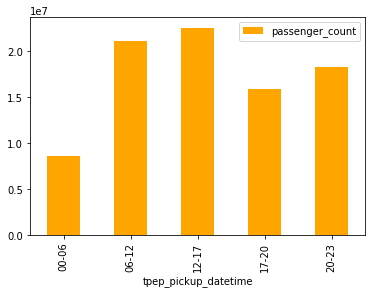

In [112]:
df.plot(kind='bar',color="orange")

# Doing that for each borough

In [ ]:
# making our df

df = pd.DataFrame()

for i in range (len(df_names)):
    temp = pd.read_csv(df_names[i], usecols= ['tpep_pickup_datetime', 'passenger_count'],
                 parse_dates= ["tpep_pickup_datetime"])
    
    
    print("temp = %d" %temp.shape[0], "tot+= %d" %tot )
    df = df.append(temp)
    

In [272]:
i = 0

In [293]:
df = pd.read_csv(df_names[i], usecols= ['tpep_pickup_datetime', 'passenger_count', 'PULocationID'],
                 parse_dates= ["tpep_pickup_datetime"])

df = pd.merge(df,taxi_zone_lookup, how = "left", left_on="PULocationID", right_on= "LocationID")

df = df.drop(axis =1, columns = ['PULocationID', 'LocationID', 'Zone', 'service_zone'])

In [294]:
df.head()

,tpep_pickup_datetime,passenger_count,Borough
0,2018-01-01 00:21:05,1,Manhattan
1,2018-01-01 00:44:55,1,Manhattan
2,2018-01-01 00:08:26,2,Manhattan
3,2018-01-01 00:20:22,1,Manhattan
4,2018-01-01 00:09:18,2,Manhattan


In [295]:
df = df.groupby(["Borough","tpep_pickup_datetime"]).sum()

In [238]:
borough_lst


['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown']

In [239]:
# for every sub dataframe (grouped by borough)
for i in range(len(borough_lst)):
    # temp is our new sub dataframe
    temp = df.loc[borough_lst[i]].head()
    
    

In [276]:
i = 0

In [296]:
temp = df.loc[borough_lst[i]]


In [279]:
temp.head()

,passenger_count
tpep_pickup_datetime,
2018-01-01 00:05:08,1
2018-01-01 00:06:58,3
2018-01-01 00:12:40,1
2018-01-01 00:15:47,2
2018-01-01 00:16:03,1


In [297]:
temp = temp.groupby(temp.index.hour).sum()

In [281]:
temp

,passenger_count
tpep_pickup_datetime,
0,48
1,99
2,113
3,115
4,86
5,60
6,26
7,40
8,11


In [283]:
#temp = temp.groupby(temp.tpep_pickup_datetime).sum()

In [284]:
#temp.head()

In [298]:
temp.reset_index(inplace=True)

In [299]:
temp.head()

,tpep_pickup_datetime,passenger_count
0,0,431
1,1,408
2,2,419
3,3,355
4,4,442


In [300]:
temp['tpep_pickup_datetime'] = temp.tpep_pickup_datetime.apply(time_slots)

In [271]:
temp

,index,tpep_pickup_datetime,passenger_count
0,0,00-06,48
1,1,00-06,99
2,2,00-06,113
3,3,00-06,115
4,4,00-06,86
5,5,00-06,60
6,6,06-12,26
7,7,06-12,40
8,8,06-12,11
9,9,06-12,8


In [301]:
temp = temp.groupby('tpep_pickup_datetime').sum()

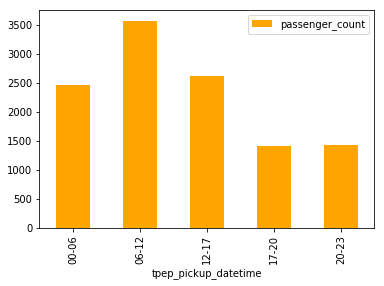

In [302]:
#PLOT CAZZO
temp.plot(kind='bar',color="orange")